In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
from matplotlib import pyplot as plt
import pylab
from pylab import plot,show,legend,title,xlabel,ylabel
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score

In [2]:
os.chdir(r'D:\DBDA\STATISTICS')
df = pd.read_csv('data.csv')

# 1) Data Understanding and Preprocessing

1.1) Load and inspect the dataset.

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.shape

(6819, 96)

------------------------------

1.2)Handle missing values appropriately.

CHECKING FOR DUPLICATE VALUES IN DATASET.

In [5]:
df.duplicated().sum()

0

HERE WE CAN SEE THERE IS NO DUPLICATE VALUES.

CHECKING IF ANY NULL VALUE IS THERE OR NOT.

In [6]:
df.isnull().sum().sum()

0

THE DATASET DOES NOT HAVE ANY NULL VALUES.

------------------------------------------

1.3) Detect and handle outliers.

HERE WE ARE CHECKING CORRELATION BETWEEN COLUMNS

In [9]:
df.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
correlation_matrix = df.corr()
correlation_matrix

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AS WE CAN SEE CORRELATION BETWEEN 'BANKRUPT' AND OTHER COLUMNS, SO I TOOK ALL THOSE VALUES WHICH ARE IMPACTING BANKRUPT WITH A RANGE OF CORRELATION
GREATER THAN 0.15 AND LESSER THAN -0.15 AND CREATING A NEW DATAFRAME AS new_df.
BELOW IS THE PROCESS:

In [11]:
get = (correlation_matrix['Bankrupt?']>0.15) | (correlation_matrix['Bankrupt?']<-0.15)
get.sum()

22

OUT OF 96 COLUMNS WE GOT 22 COLUMNS WHICH ARE IMPACTING BANKRUPT SIGNIFICANTLY(NOT MUCH BUT TO A SOME AMOUNT)

In [12]:
pred_colms = (get[get].index.to_list())
pred_colms

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 ' Current Liability to Assets',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Current Liability to Equity',
 ' Current Liability to Current Assets',
 ' Net Income to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity']

In [23]:
new_df = df[pred_colms]
new_df.shape

(6819, 22)

In [24]:
new_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,...,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Current Liabilities/Equity,Retained Earnings to Total Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
0,1,0.370594,0.424389,0.405750,0.147950,0.147950,0.147950,0.169141,0.138736,0.207576,...,0.137757,0.672775,0.147308,0.339077,0.903225,0.339077,0.118250,0.716845,0.827890,0.290202
1,1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.171176,...,0.168962,0.751111,0.056963,0.329740,0.931065,0.329740,0.047775,0.795297,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.207516,...,0.148036,0.829502,0.098162,0.334777,0.909903,0.334777,0.025346,0.774670,0.836774,0.290189
3,1,0.399844,0.451265,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.151465,...,0.147561,0.725754,0.098715,0.331509,0.906902,0.331509,0.067250,0.739555,0.834697,0.281721
4,1,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.106509,...,0.167461,0.751822,0.110195,0.330726,0.913850,0.330726,0.047725,0.795016,0.839973,0.278514


In [25]:
new_df.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,...,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Current Liabilities/Equity,Retained Earnings to Total Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.165399,-0.165465,-0.164784,-0.219560,-0.201395,0.250161,...,-0.207857,-0.193083,0.194494,0.153828,-0.217779,0.153828,0.171306,-0.315457,-0.180987,0.166812
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.505580,0.505407,0.505281,0.775006,0.750564,-0.261427,...,0.753339,0.259680,-0.210256,-0.142734,0.650217,-0.142734,-0.160725,0.887670,0.274287,-0.143629
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.531799,0.531790,0.531821,0.764828,0.752578,-0.259972,...,0.758234,0.303532,-0.190501,-0.133816,0.718013,-0.133816,-0.195673,0.961552,0.291744,-0.141039
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.502052,0.502000,0.501907,0.764597,0.722940,-0.264734,...,0.726003,0.260151,-0.217186,-0.142879,0.673738,-0.142879,-0.162572,0.912040,0.280617,-0.142838
Net Value Per Share (B),-0.165399,0.505580,0.531799,0.502052,1.000000,0.999342,0.999179,0.755568,0.726321,-0.249146,...,0.706646,0.198620,-0.198546,-0.102098,0.491365,-0.102098,-0.164367,0.493776,0.148693,-0.110850
Net Value Per Share (A),-0.165465,0.505407,0.531790,0.502000,0.999342,1.000000,0.999837,0.755409,0.725956,-0.249925,...,0.705800,0.199598,-0.199086,-0.102539,0.492760,-0.102539,-0.165083,0.493803,0.148872,-0.111797
Net Value Per Share (C),-0.164784,0.505281,0.531821,0.501907,0.999179,0.999837,1.000000,0.755217,0.725825,-0.249463,...,0.705621,0.199475,-0.198721,-0.102431,0.492734,-0.102431,-0.165011,0.493822,0.148906,-0.111682
Persistent EPS in the Last Four Seasons,-0.219560,0.775006,0.764828,0.764597,0.755568,0.755409,0.755217,1.000000,0.955591,-0.177429,...,0.959461,0.253188,-0.097689,-0.094966,0.492078,-0.094966,-0.154690,0.691152,0.222961,-0.114114
Per Share Net profit before tax (Yuan ¥),-0.201395,0.750564,0.752578,0.722940,0.726321,0.725956,0.725825,0.955591,1.000000,-0.158897,...,0.962723,0.238435,-0.079795,-0.089174,0.473736,-0.089174,-0.148721,0.671748,0.218389,-0.107727
Debt ratio %,0.250161,-0.261427,-0.259972,-0.264734,-0.249146,-0.249925,-0.249463,-0.177429,-0.158897,1.000000,...,-0.164110,-0.528797,0.842583,0.343692,-0.235423,0.343692,0.428180,-0.281422,-0.123986,0.349250


In [26]:
new_df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Current Liability to Assets',
       ' Current Liabilities/Equity', ' Retained Earnings to Total Assets',
       ' Current Liability to Equity', ' Current Liability to Current Assets',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity'],
      dtype='object')

HERE I AM CHECKING CORRELATION OF ALL THE COLUMNS WITH BANKRUPT.

In [27]:
new_df.corr()['Bankrupt?']

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Net Value Per Share (B)                                   -0.165399
 Net Value Per Share (A)                                   -0.165465
 Net Value Per Share (C)                                   -0.164784
 Persistent EPS in the Last Four Seasons                   -0.219560
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Debt ratio %                                               0.250161
 Net worth/Assets                                          -0.250161
 Borrowing dependency                                       0.176543
 Net profit before tax/Paid-in capital                     -0.207857
 Working Capital to Total Assets                           -0.193083
 Current Liability to Assets      

CHANGING COLUMN NAMES AS PER MY READABILITY

In [28]:
new_column_names = {
    'Bankrupt?': 'Bankrupt',
    ' ROA(C) before interest and depreciation before interest': 'ROA(C)',
    ' ROA(A) before interest and % after tax': 'ROA(A)',
    ' ROA(B) before interest and depreciation after tax': 'ROA(B)',
    ' Net Value Per Share (B)': 'NVPS(B)',
    ' Net Value Per Share (A)': 'NVPS(A)',
    ' Net Value Per Share (C)': 'NVPS(C)',
    ' Persistent EPS in the Last Four Seasons':'EPS_LAST_FOUR_SEASON',
    ' Per Share Net profit before tax (Yuan ¥)':'PSNP_BTAX',
    ' Debt ratio %': 'Debt_Ratio',
    ' Net worth/Assets': 'Net_Worth/Assets',
    ' Borrowing dependency':'B_D',
    ' Net profit before tax/Paid-in capital': 'Net_Profit_before_Tax/Paid-in_Capital',
    ' Working Capital to Total Assets': 'Working_Capital/Total_Assets',
    ' Current Liability to Assets': 'Current_Liability/Assets',
    ' Current Liabilities/Equity': 'Current_Liabilities/Equity',
    ' Retained Earnings to Total Assets': 'Retained_Earnings/Total_Assets',
    ' Current Liability to Equity':'Current_Liability_to_Equity',
    ' Current Liability to Current Assets':'Current_Liability_to_Current_Assets',
    ' Net Income to Total Assets': 'Net_Income_to_Total_Assets',
    ' Net Income to Stockholder\'s Equity' : 'Net_Income_Stockholder\'s_Equity',
    ' Liability to Equity' : 'Liability_to_Equity'
}

new_df.rename(columns=new_column_names, inplace=True)

C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_9148\346160035.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=new_column_names, inplace=True)


In [29]:
new_df.columns

Index(['Bankrupt', 'ROA(C)', 'ROA(A)', 'ROA(B)', 'NVPS(B)', 'NVPS(A)',
       'NVPS(C)', 'EPS_LAST_FOUR_SEASON', 'PSNP_BTAX', 'Debt_Ratio',
       'Net_Worth/Assets', 'B_D', 'Net_Profit_before_Tax/Paid-in_Capital',
       'Working_Capital/Total_Assets', 'Current_Liability/Assets',
       'Current_Liabilities/Equity', 'Retained_Earnings/Total_Assets',
       'Current_Liability_to_Equity', 'Current_Liability_to_Current_Assets',
       'Net_Income_to_Total_Assets', 'Net_Income_Stockholder's_Equity',
       'Liability_to_Equity'],
      dtype='object')

HERE WE ARE DETECTING OUTLIERS USING BOXPLOT FOR ALL THE 22 COLUMNS.

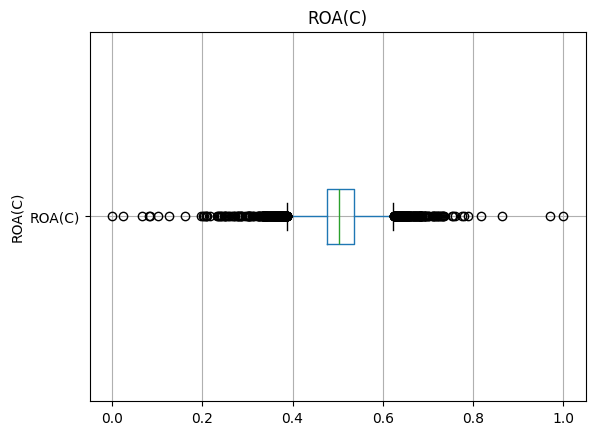

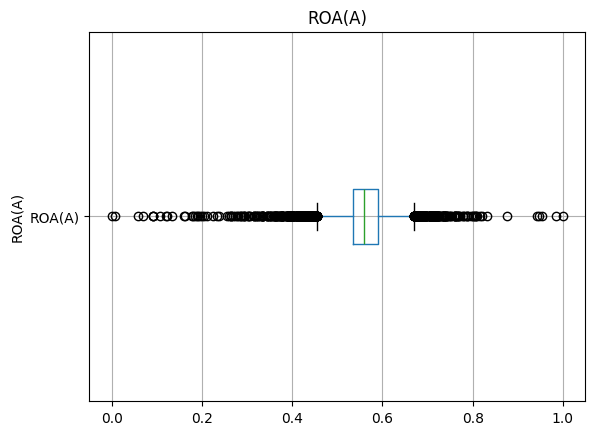

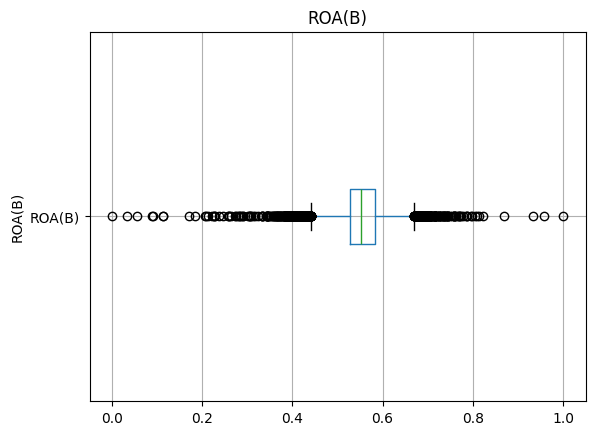

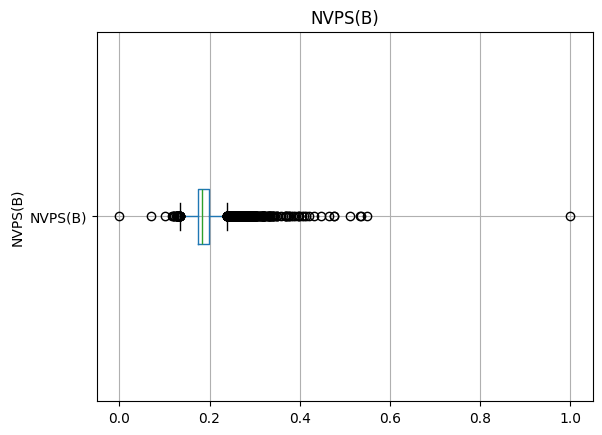

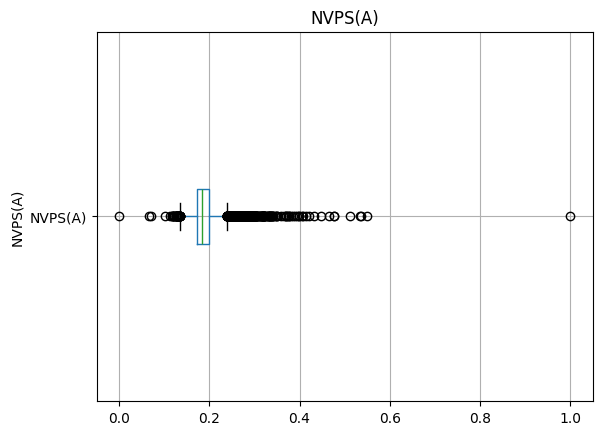

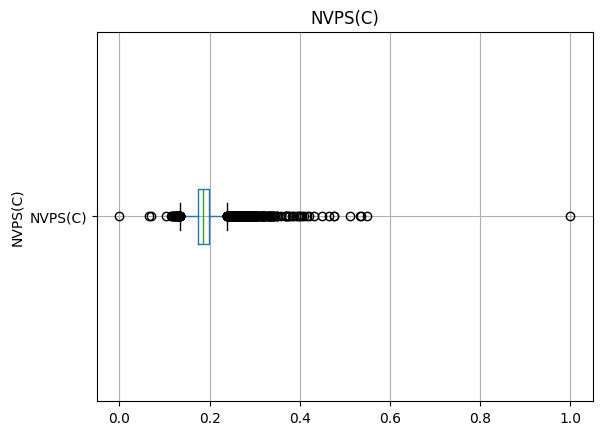

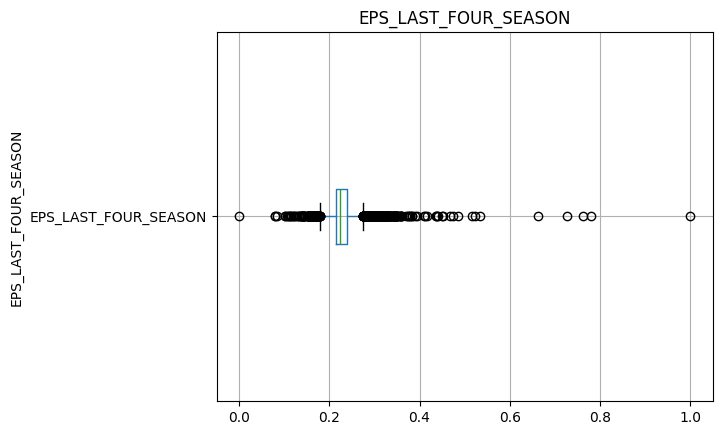

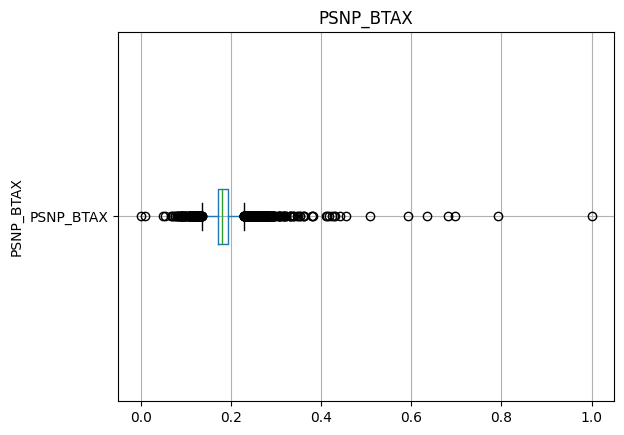

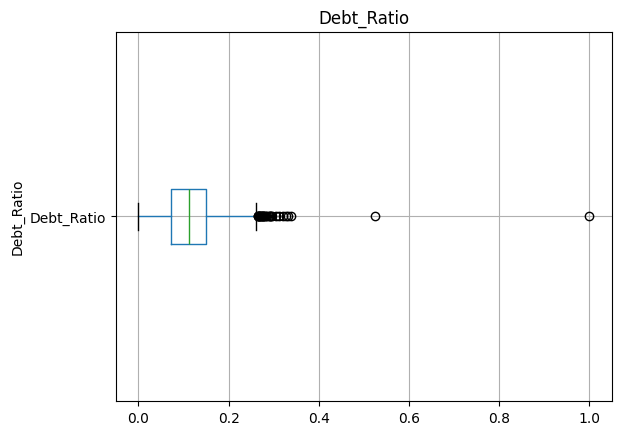

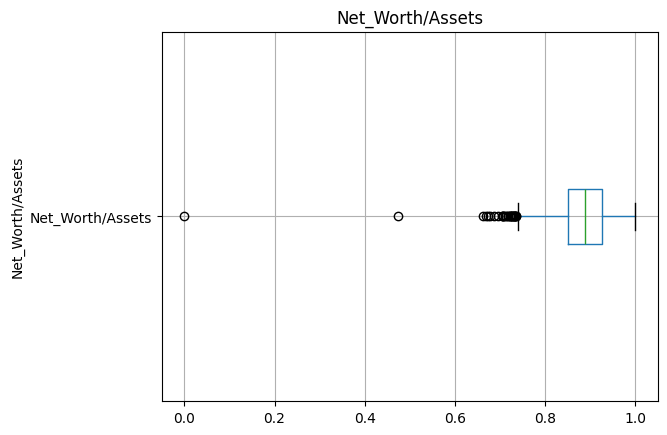

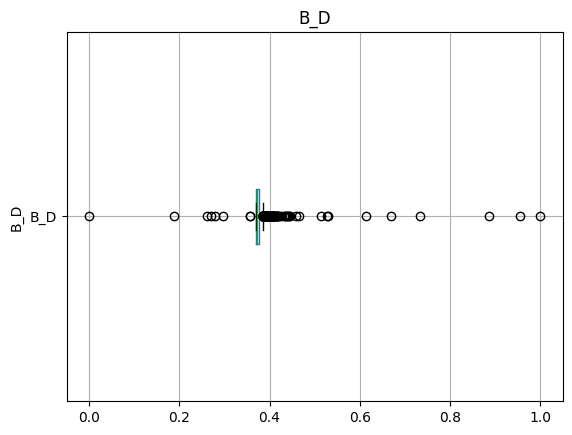

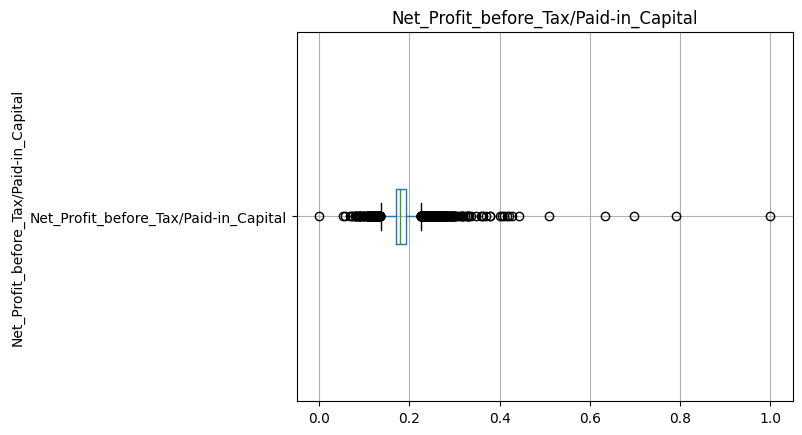

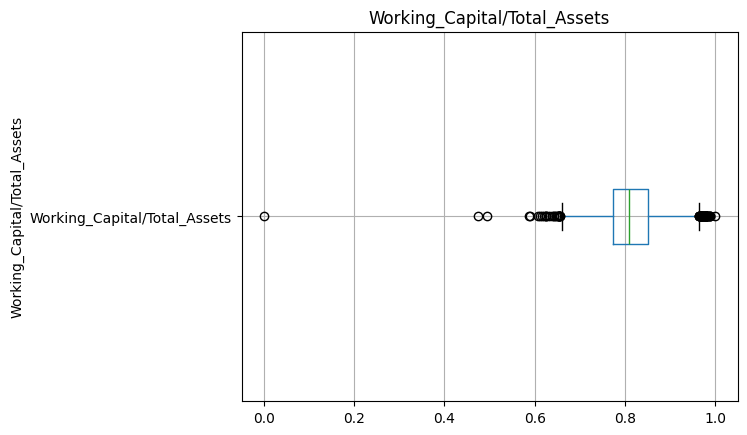

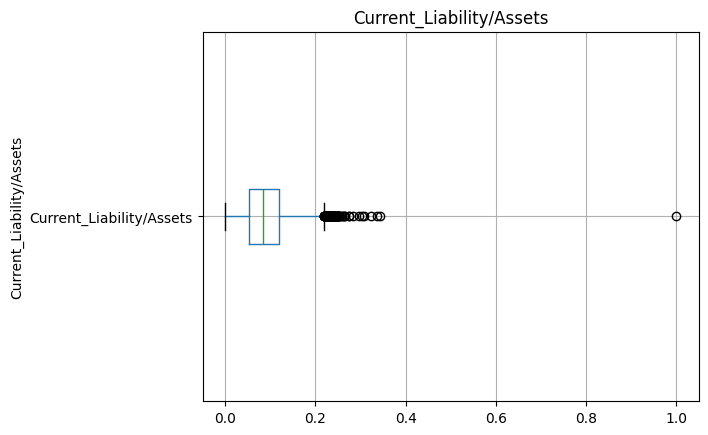

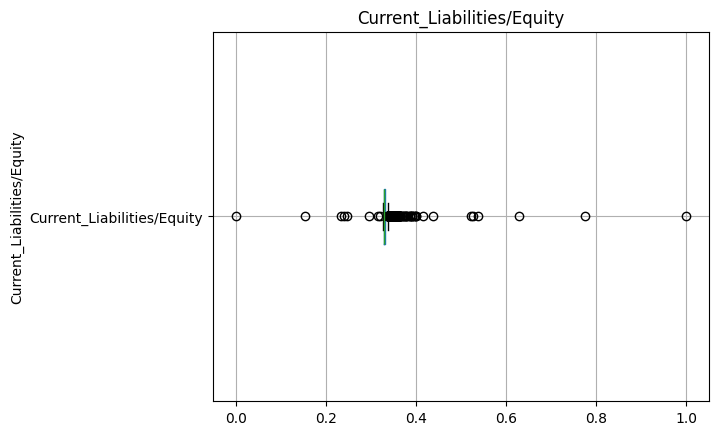

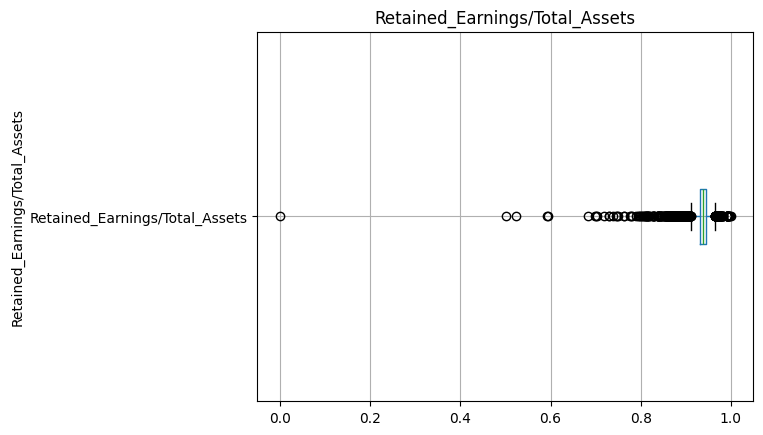

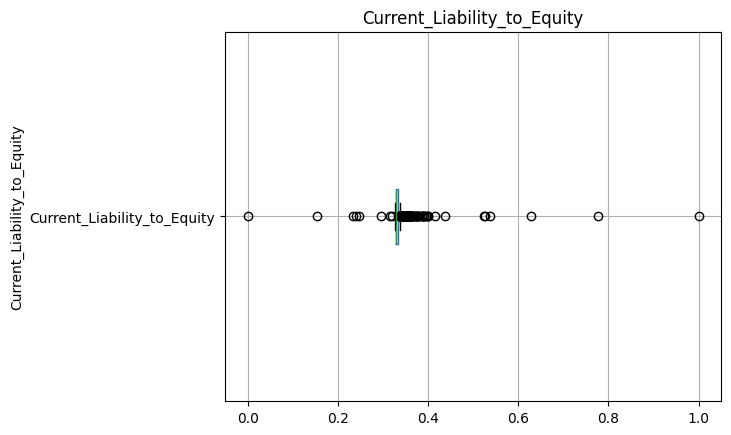

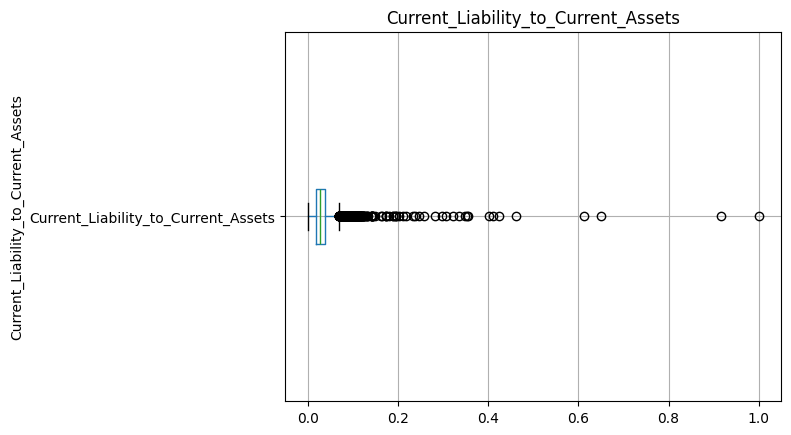

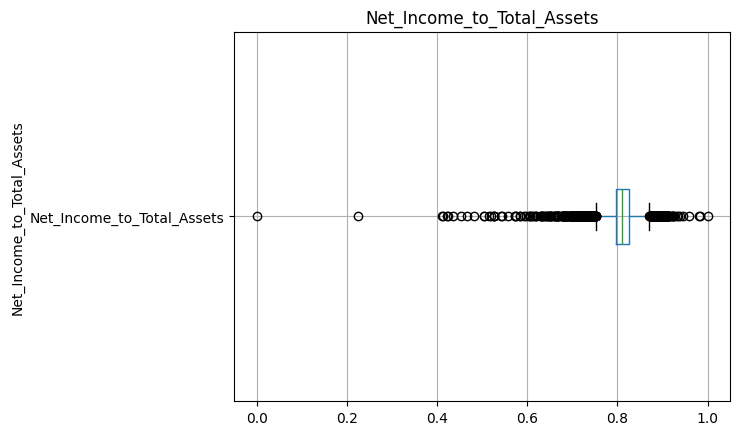

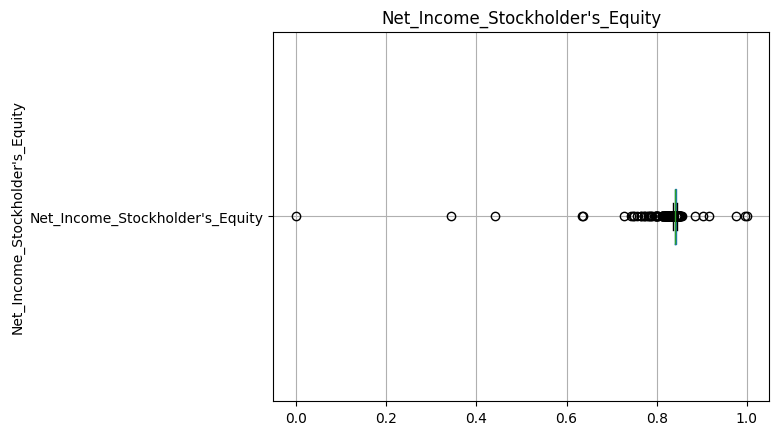

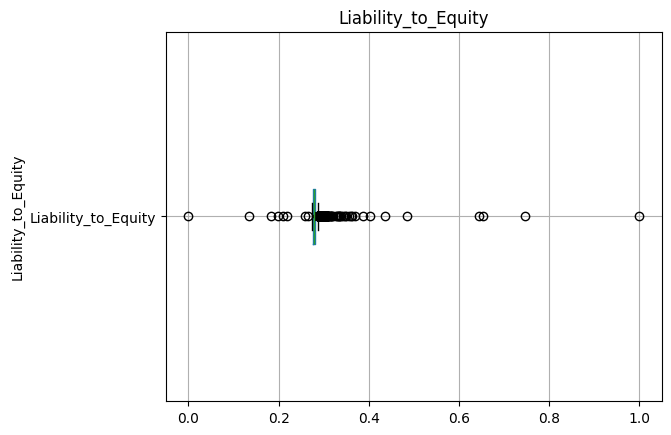

In [30]:
for column in new_df:
    if column != 'Bankrupt':
        new_df.boxplot(column, vert=False)
        plt.ylabel(column)
        plt.title(column)
        plt.show()

HERE I CREATED AN IMPUTE FUNCTION TO HANDLE OUTLIERS, BASICALLY IF THERE IS ANY EXTREME OUTLIERS WE ARE CHANINGING ITS VALUE 
AS NEAR AS POSSIBLE TO OUTTER BOUND AND VICE VERSA FOR LOWER BOUND

In [31]:
def impute(x):
    Q3=new_df[x].quantile(0.75)
    Q1=new_df[x].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1-2.0*(IQR)
    ub=Q3+2.0*(IQR)
    idx=np.where(new_df[x]>ub)
    new_df[x].iloc[idx]=ub
    idx=np.where(new_df[x]<lb)
    new_df[x].iloc[idx]=lb

In [32]:
for column in new_df:
    if column!='Bankrupt':
        impute(column)

C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_9148\436318581.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df[x].iloc[idx]=ub
C:\Users\PC-ASUS\AppData\Local\Temp\ipykernel_9148\436318581.py:8: SettingWithCopyWarning: 
A value is tr

AFTER HANDLING OUTLIERS WE AGAIN PLOTTED BOXPLOT FOR EACH COLUMNS AND WE CAN SIGNIFICANT DIFFERNCE FROM LAST BOXPLOT.

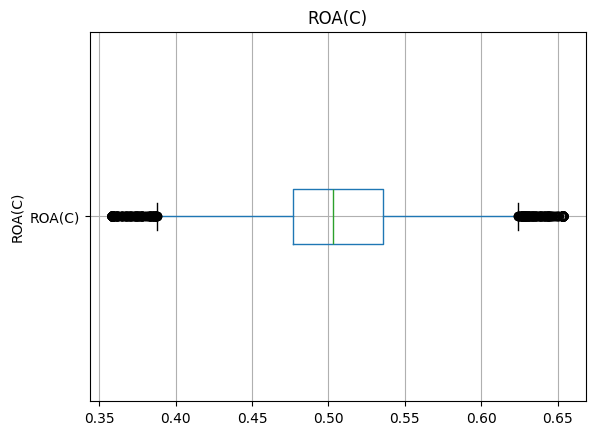

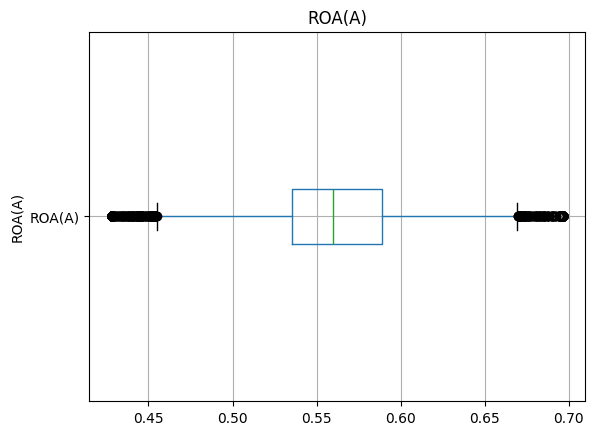

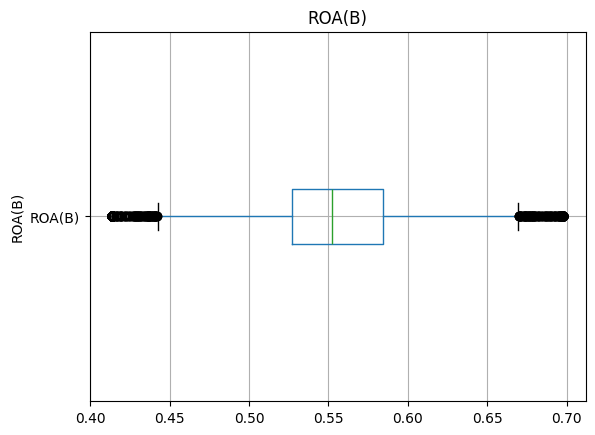

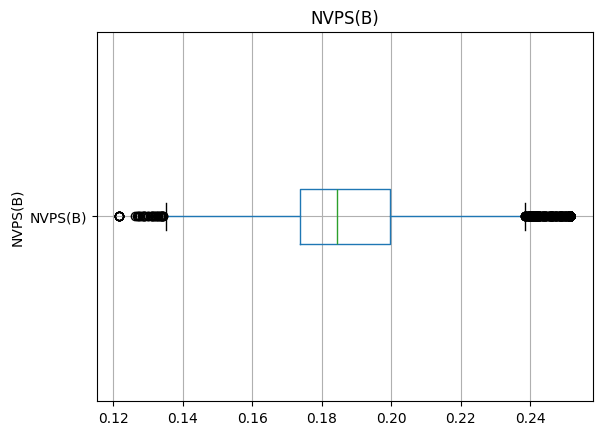

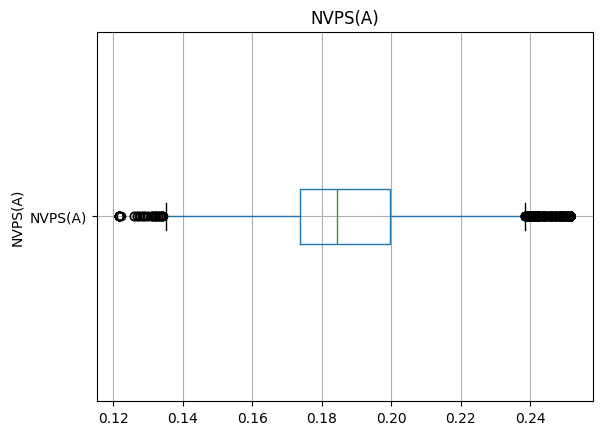

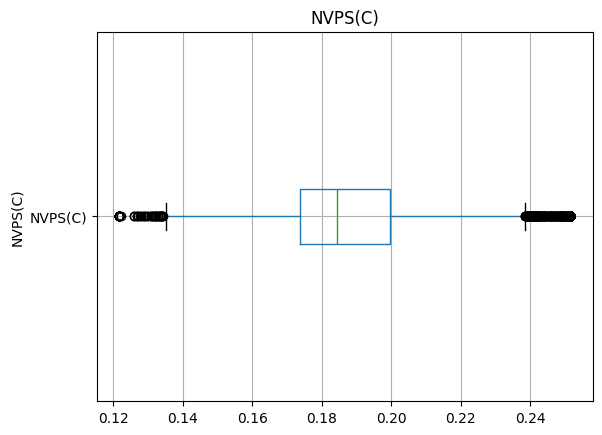

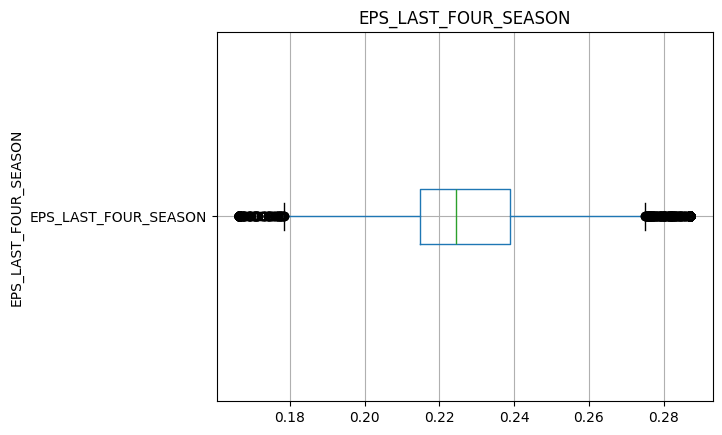

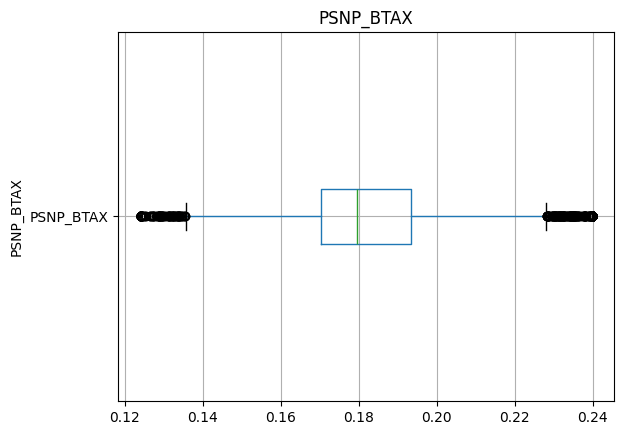

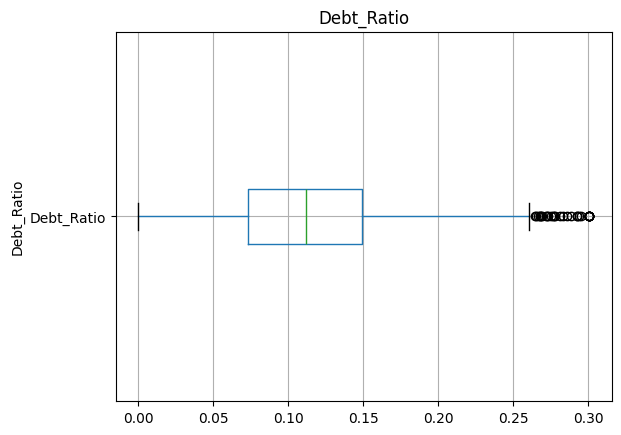

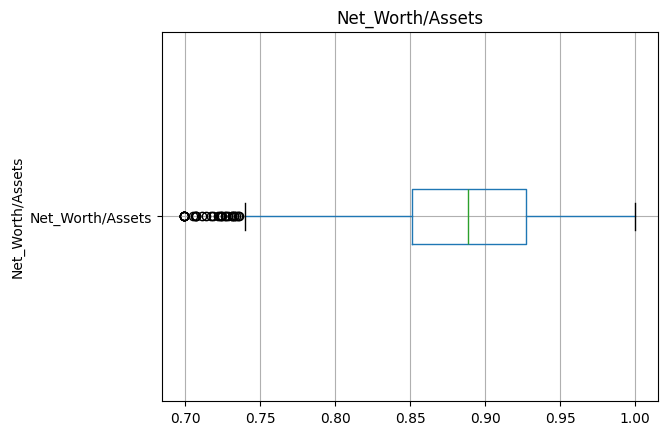

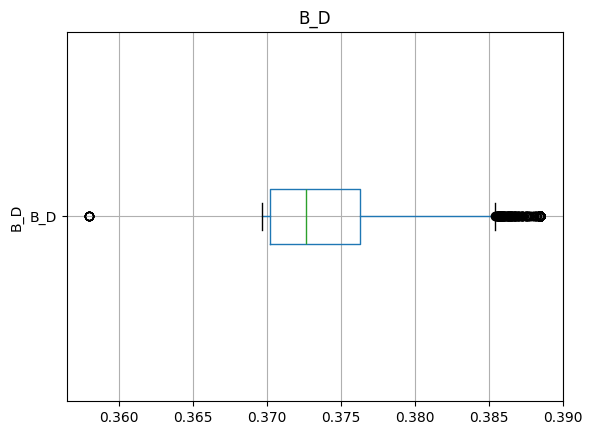

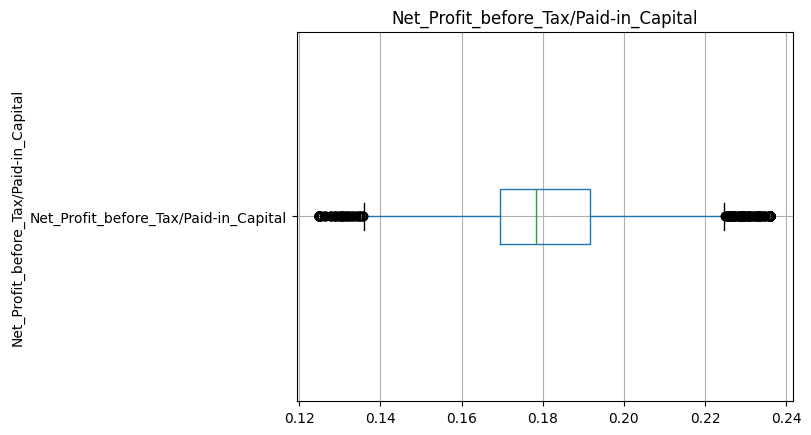

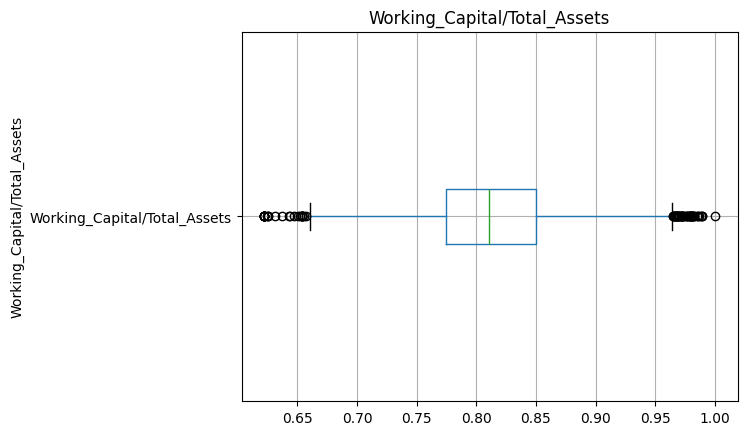

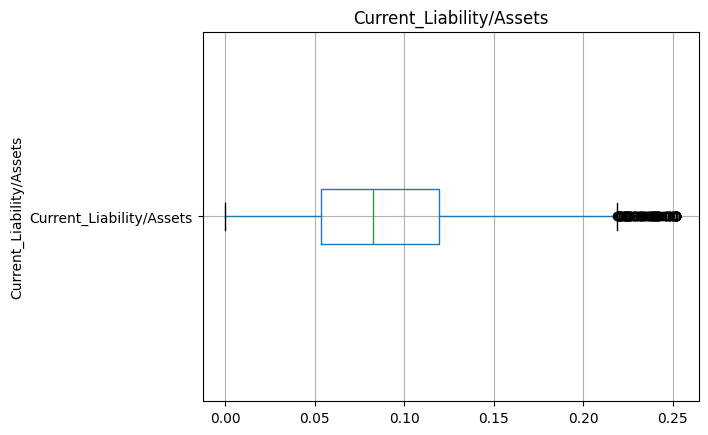

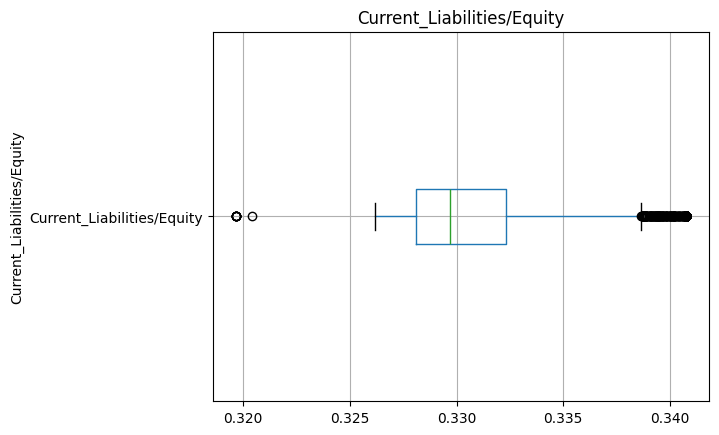

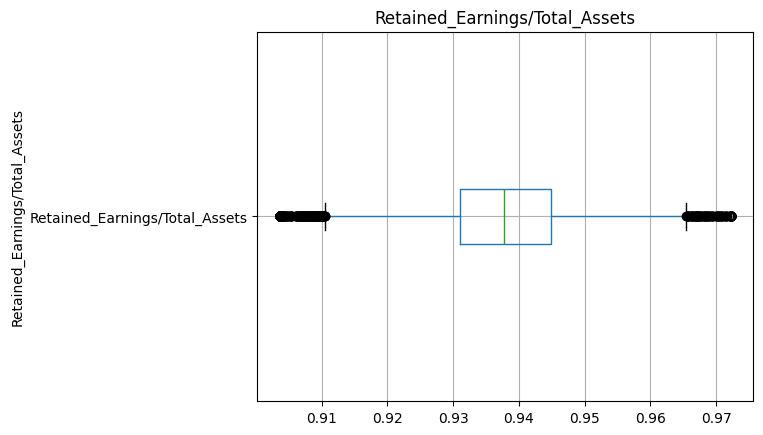

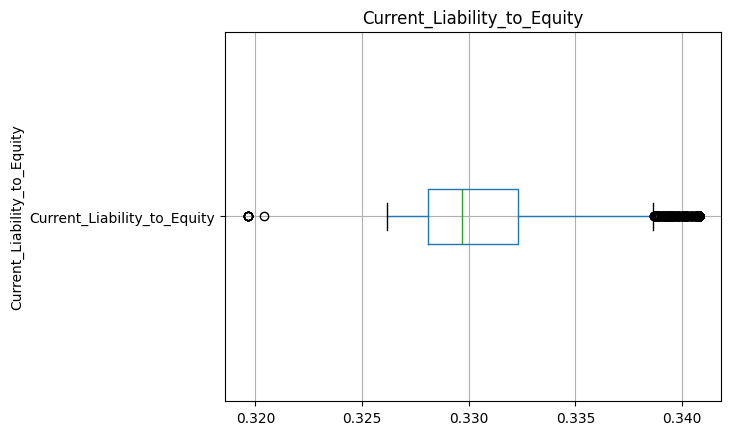

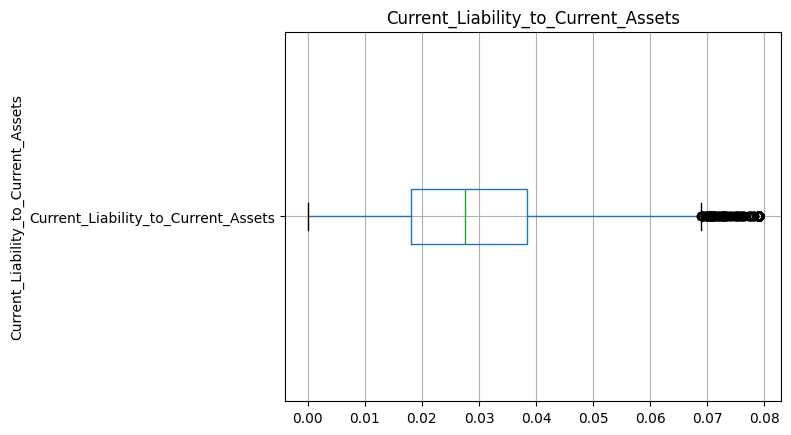

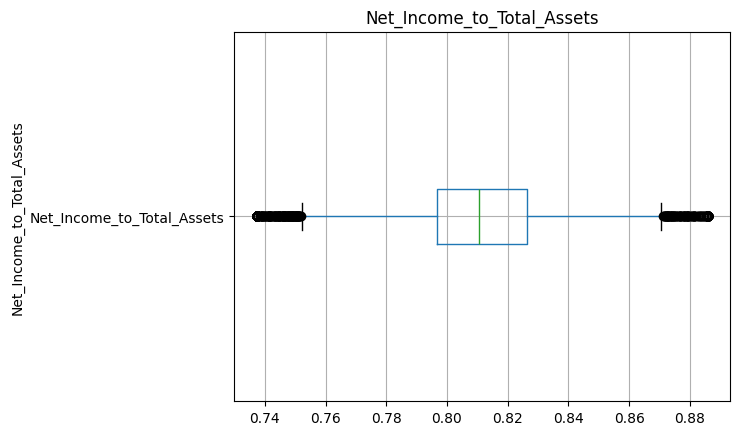

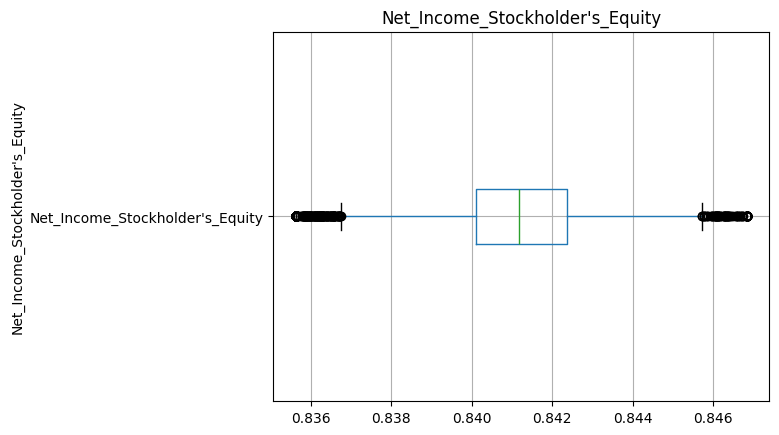

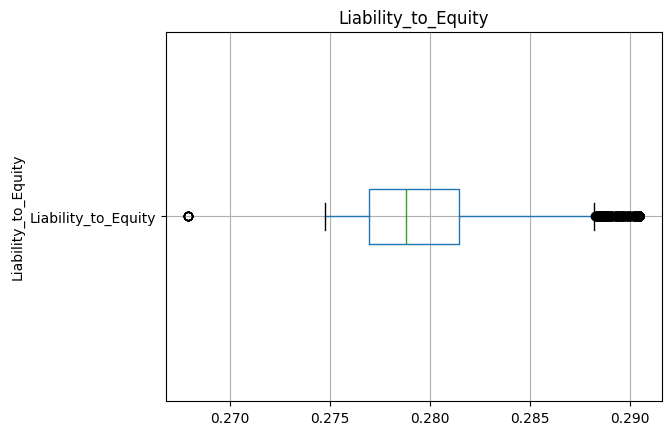

In [33]:
for column in new_df:
    if column != 'Bankrupt':
        new_df.boxplot(column, vert=False)
        plt.ylabel(column)
        plt.title(column)
        plt.show()

In [34]:
new_df.corr()

,Bankrupt,ROA(C),ROA(A),ROA(B),NVPS(B),NVPS(A),NVPS(C),EPS_LAST_FOUR_SEASON,PSNP_BTAX,Debt_Ratio,...,Net_Profit_before_Tax/Paid-in_Capital,Working_Capital/Total_Assets,Current_Liability/Assets,Current_Liabilities/Equity,Retained_Earnings/Total_Assets,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Net_Income_Stockholder's_Equity,Liability_to_Equity
Bankrupt,1.000000,-0.245316,-0.247435,-0.249135,-0.209119,-0.208940,-0.207941,-0.260872,-0.248270,0.251397,...,-0.250559,-0.194614,0.196165,0.221924,-0.264519,0.221924,0.238762,-0.267206,-0.268287,0.251469
ROA(C),-0.245316,1.000000,0.943916,0.988646,0.582533,0.582056,0.581746,0.887092,0.875084,-0.259295,...,0.873956,0.267604,-0.202704,-0.231732,0.799457,-0.231732,-0.266337,0.930495,0.882729,-0.259205
ROA(A),-0.247435,0.943916,1.000000,0.955028,0.624715,0.624444,0.624338,0.910864,0.911700,-0.257826,...,0.910761,0.327041,-0.173611,-0.209307,0.851610,-0.209307,-0.309602,0.989795,0.943832,-0.253743
ROA(B),-0.249135,0.988646,0.955028,1.000000,0.584298,0.583962,0.583682,0.891080,0.863604,-0.263908,...,0.862320,0.273717,-0.209289,-0.236916,0.804721,-0.236916,-0.272322,0.942653,0.893838,-0.262463
NVPS(B),-0.209119,0.582533,0.624715,0.584298,1.000000,0.999501,0.999203,0.745726,0.745151,-0.269906,...,0.747306,0.220036,-0.214703,-0.236972,0.752301,-0.236972,-0.258791,0.628300,0.603959,-0.264160
NVPS(A),-0.208940,0.582056,0.624444,0.583962,0.999501,1.000000,0.999702,0.745632,0.744833,-0.270650,...,0.746410,0.220923,-0.215278,-0.237925,0.752628,-0.237925,-0.260072,0.628145,0.604288,-0.265166
NVPS(C),-0.207941,0.581746,0.624338,0.583682,0.999203,0.999702,1.000000,0.745238,0.744583,-0.269956,...,0.746059,0.220689,-0.214744,-0.237276,0.752263,-0.237276,-0.259827,0.627978,0.604165,-0.264432
EPS_LAST_FOUR_SEASON,-0.260872,0.887092,0.910864,0.891080,0.745726,0.745632,0.745238,1.000000,0.975951,-0.208339,...,0.979642,0.303530,-0.120770,-0.160305,0.822472,-0.160305,-0.283533,0.903097,0.901005,-0.208944
PSNP_BTAX,-0.248270,0.875084,0.911700,0.863604,0.745151,0.744833,0.744583,0.975951,1.000000,-0.199157,...,0.992548,0.300276,-0.110134,-0.149510,0.818868,-0.149510,-0.279419,0.899493,0.897332,-0.199927
Debt_Ratio,0.251397,-0.259295,-0.257826,-0.263908,-0.269906,-0.270650,-0.269956,-0.208339,-0.199157,1.000000,...,-0.201780,-0.512916,0.837548,0.860958,-0.312802,0.860958,0.643171,-0.299347,-0.183192,0.930072


# 2)Exploratory Data Analysis (EDA)

2.1) Generate descriptive statistics

HERE WE CAN SE VARIOUS STATISTICS PARAMETERS FOR EACH COLUMN.

In [80]:
new_df.describe()

,Bankrupt,ROA(C),ROA(A),ROA(B),NVPS(B),NVPS(A),NVPS(C),EPS_LAST_FOUR_SEASON,PSNP_BTAX,Debt_Ratio,...,Net_Profit_before_Tax/Paid-in_Capital,Working_Capital/Total_Assets,Current_Liability/Assets,Current_Liabilities/Equity,Retained_Earnings/Total_Assets,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Net_Income_Stockholder's_Equity,Liability_to_Equity
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505614,0.560146,0.554508,0.188726,0.188709,0.188748,0.227411,0.182821,0.113022,...,0.181375,0.814271,0.090485,0.330816,0.936659,0.330816,0.029816,0.809654,0.841008,0.279793
std,0.176710,0.054460,0.053935,0.053588,0.024399,0.024473,0.024483,0.023563,0.022551,0.052627,...,0.021424,0.058039,0.048805,0.003726,0.014036,0.003726,0.016497,0.029884,0.002234,0.003848
min,0.000000,0.358456,0.428314,0.413620,0.121697,0.121697,0.121803,0.166493,0.124124,0.000000,...,0.124915,0.622161,0.000000,0.319643,0.903667,0.319643,0.000000,0.737340,0.835630,0.267934
25%,0.000000,0.476527,0.535543,0.527277,0.173613,0.173613,0.173676,0.214711,0.170370,0.072891,...,0.169376,0.774309,0.053301,0.328096,0.931097,0.328096,0.018034,0.796750,0.840115,0.276944
50%,0.000000,0.502706,0.559802,0.552278,0.184400,0.184400,0.184400,0.224544,0.179709,0.111407,...,0.178456,0.810275,0.082705,0.329685,0.937672,0.329685,0.027597,0.810619,0.841179,0.278778
75%,0.000000,0.535563,0.589157,0.584105,0.199570,0.199570,0.199612,0.238820,0.193493,0.148804,...,0.191607,0.850383,0.119523,0.332322,0.944811,0.332322,0.038375,0.826455,0.842357,0.281449
max,1.000000,0.653634,0.696386,0.697762,0.251485,0.251485,0.251485,0.287038,0.239738,0.300632,...,0.236068,1.000000,0.251966,0.340776,0.972241,0.340776,0.079057,0.885864,0.846841,0.290459




2.2)Visualize feature distributions and target variable.



BELOW IS THE HEAT MAP OF THE CORRELATION BETWEEN THE 22 COLUMNS. HERE WE CAN SEE;

a) IF THE CORRELATION IS GOING TOWARDS +1, THEN THERE IS POSITIVE CORRELATION, WHICH MEANS IF X IS DIRECTLY PROPORTIONAL.IF X INCREASES,Y ALSO INCREASES.

b) IF CORRELATION IS MORE TOWARDS 1(BOTH + AND -) THEN MORE SIGNIFICANT CHANGE IS THERE.
c) IF THE CORRELATION IS GOING TOWARDS -1, THEN THERE IS NEGATIVE CORRELATION, WHICH MEANS IF X IS INDIRECTLY PROPORTIONAL.IF X INCREASES,Y DECREASES.

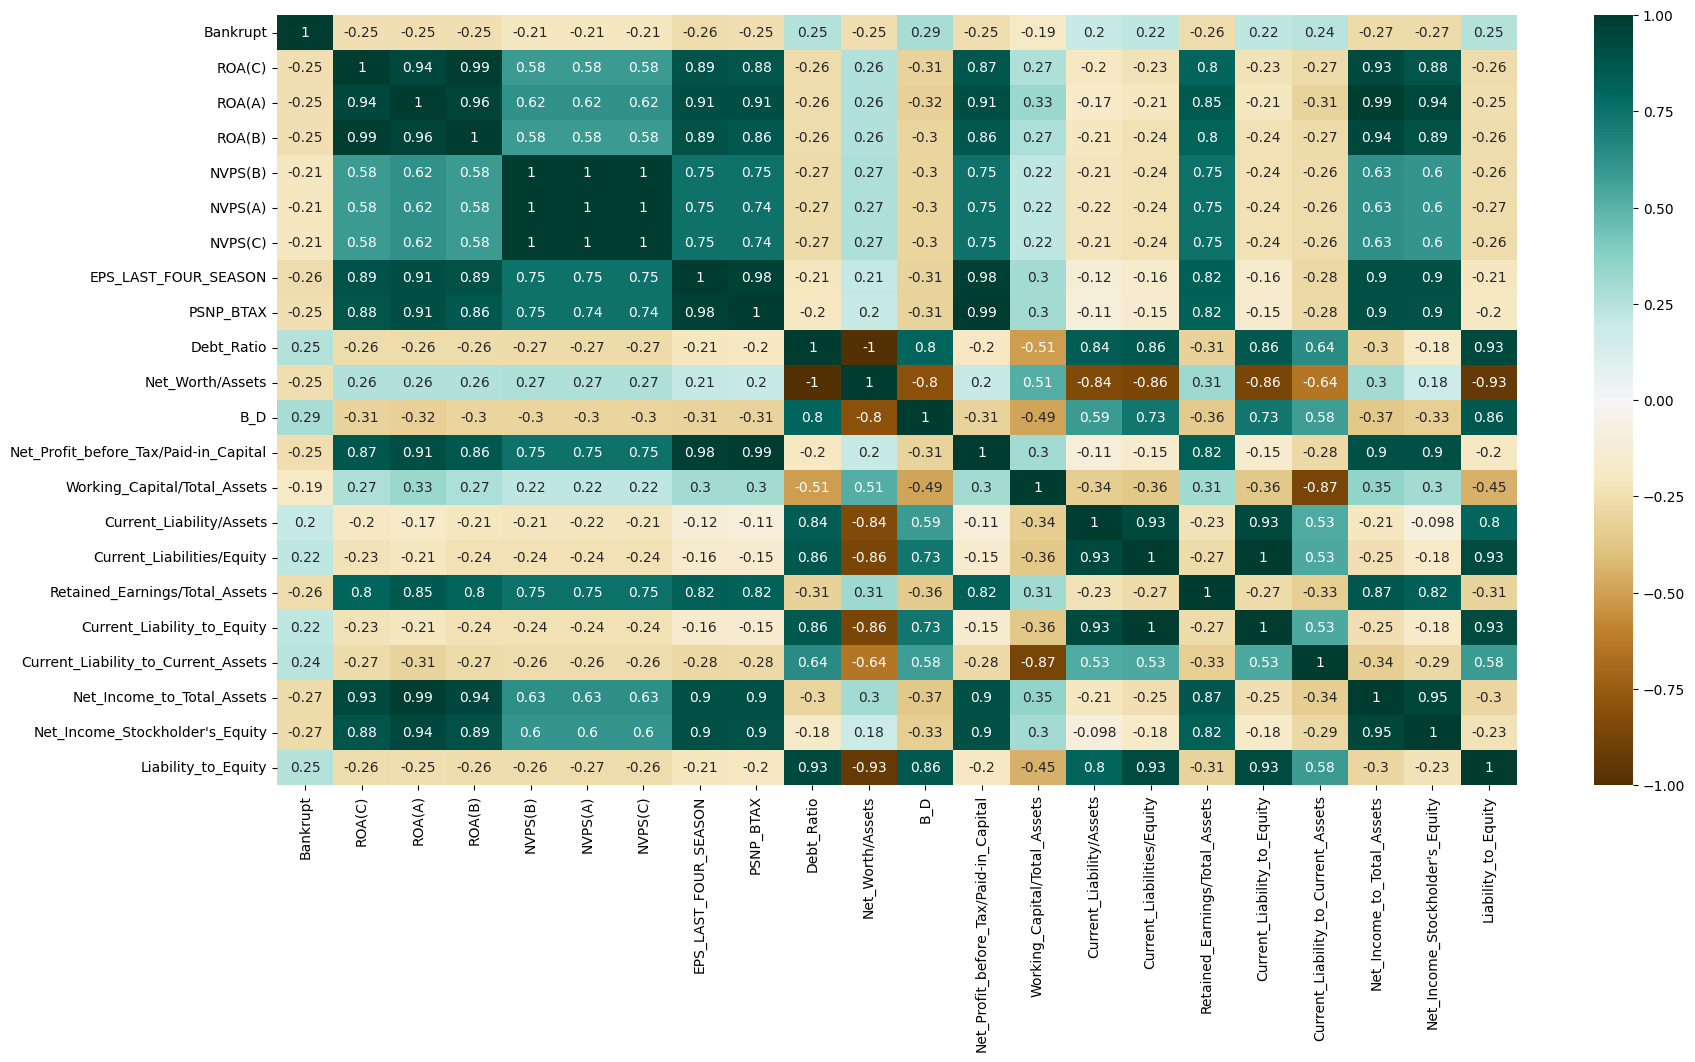

In [35]:
plt.figure(figsize=(20,10))
show(sns.heatmap(new_df.corr(),cmap="BrBG",annot=True))

2.3)Analyze relationships between features and the target variable.

WE HAVE DONE FEATURE ENGINEERING ALREADY WHERE WE USED CORRELATION TO SELECT COLUMNS FOR TARGET VARIABLE WHICH IS BANKRUPT.

--------------------------------

# Hypothesis Testing

3.a) Perform hypothesis testing to identify significant features influencing bankruptcy.

HERE WE USED 2 SAMPLE T TEST BECAUSE OUR DATA i.e. IS COLUMN IS CONTINOUS.

NULL HYPOTHESIS--> H0 = COLUMN DOES IMPACT BANKRUPT

ALTERNATE HYPOTHESIS--> Ha = COLUMN DOES NOT IMPACT BANKRUPT

In [36]:
significant_features = []
for column in new_df.columns[:-1]:  
    t_stat, p_value = stats.ttest_ind(new_df[column][new_df['Bankrupt'] == 1], new_df[column][new_df['Bankrupt'] == 0])
    if p_value < 0.05:
        significant_features.append(column)


significant_features


C:\Users\PC-ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


['Bankrupt',
 'ROA(C)',
 'ROA(A)',
 'ROA(B)',
 'NVPS(B)',
 'NVPS(A)',
 'NVPS(C)',
 'EPS_LAST_FOUR_SEASON',
 'PSNP_BTAX',
 'Debt_Ratio',
 'Net_Worth/Assets',
 'B_D',
 'Net_Profit_before_Tax/Paid-in_Capital',
 'Working_Capital/Total_Assets',
 'Current_Liability/Assets',
 'Current_Liabilities/Equity',
 'Retained_Earnings/Total_Assets',
 'Current_Liability_to_Equity',
 'Current_Liability_to_Current_Assets',
 'Net_Income_to_Total_Assets',
 "Net_Income_Stockholder's_Equity"]

THESE VALUES DOES IMPACT ON BANKRUPT

In [37]:
len(significant_features)

21

In [65]:
x_train = new_df.iloc[:4500]

In [66]:
x_train

,Bankrupt,ROA(C),ROA(A),ROA(B),NVPS(B),NVPS(A),NVPS(C),EPS_LAST_FOUR_SEASON,PSNP_BTAX,Debt_Ratio,...,Net_Profit_before_Tax/Paid-in_Capital,Working_Capital/Total_Assets,Current_Liability/Assets,Current_Liabilities/Equity,Retained_Earnings/Total_Assets,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Net_Income_Stockholder's_Equity,Liability_to_Equity
0,1,0.370594,0.428314,0.413620,0.147950,0.147950,0.147950,0.169141,0.138736,0.207576,...,0.137757,0.672775,0.147308,0.339077,0.903667,0.339077,0.079057,0.737340,0.835630,0.290202
1,1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.171176,...,0.168962,0.751111,0.056963,0.329740,0.931065,0.329740,0.047775,0.795297,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.207516,...,0.148036,0.829502,0.098162,0.334777,0.909903,0.334777,0.025346,0.774670,0.836774,0.290189
3,1,0.399844,0.451265,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.151465,...,0.147561,0.725754,0.098715,0.331509,0.906902,0.331509,0.067250,0.739555,0.835630,0.281721
4,1,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.106509,...,0.167461,0.751822,0.110195,0.330726,0.913850,0.330726,0.047725,0.795016,0.839973,0.278514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,0.490128,0.543775,0.543284,0.248620,0.248620,0.248620,0.220762,0.176395,0.106267,...,0.175266,0.777697,0.047499,0.328138,0.932827,0.328138,0.029450,0.800347,0.840359,0.278501
4496,0,0.511919,0.578064,0.566465,0.184400,0.184400,0.184400,0.229933,0.184228,0.110590,...,0.183146,0.796070,0.084211,0.329731,0.939984,0.329731,0.030057,0.821412,0.841927,0.278742
4497,0,0.495052,0.556149,0.549976,0.208672,0.208672,0.208672,0.227475,0.181140,0.139190,...,0.180115,0.781786,0.109652,0.331639,0.935421,0.331639,0.036616,0.808274,0.841118,0.280665
4498,0,0.546239,0.607229,0.595214,0.215288,0.215288,0.215288,0.247896,0.203886,0.084530,...,0.202775,0.794772,0.082425,0.329229,0.944875,0.329229,0.030144,0.837331,0.842731,0.277438


In [67]:
x_test = new_df.iloc[4500:]

In [68]:
y_train = x_train.Bankrupt
y_test = x_test.Bankrupt

In [69]:
x_train=x_train.drop(['Bankrupt'],axis =1)
x_test = x_test.drop(['Bankrupt'],axis =1)

In [70]:
x_train = sm.add_constant(x_train,prepend=False)
x_test = sm.add_constant(x_test,prepend=False)

In [71]:
mod2 = sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.103605
         Iterations 11


In [72]:
print(mod2.summary())

                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4480
Method:                           MLE   Df Model:                           19
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3957
Time:                        20:53:56   Log-Likelihood:                -466.22
converged:                       True   LL-Null:                       -771.57
Covariance Type:            nonrobust   LLR p-value:                2.797e-117
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
ROA(C)                                  -45.2769     13.349     -3.392      0.001     -71.441     -19.112
ROA(A)                                   52.1537  

In [73]:
logistic_model=LogisticRegression()

In [74]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred = logistic_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2284
           1       0.60      0.09      0.15        35

    accuracy                           0.99      2319
   macro avg       0.79      0.54      0.57      2319
weighted avg       0.98      0.99      0.98      2319



In [77]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9853385079775765


DATA IS RIGHT SKEWED. AS THERE IS NO VALUES FOR BANKRUPT DATA. AND THIS MODEL IS NOT PERFECT SO I DID ALTERNATE METHOD FOR THIS.THE REASON BEING
FOR COMPANIES HAVING BANKRUPT = 0 THERE ARE 6599 ROWS

BUT FOR BANKRUPT =1 THERE ARE 220 ROWS. SO BECAUSE OF THIS MODEL ACCURACY NOT CORRECT.

BELOW IS MY ALTERNATIVE METHOD.

In [79]:
print(confusion_matrix(y_test,y_pred))

[[2282    2]
 [  32    3]]


In [38]:
new_df[new_df.Bankrupt==0]

,Bankrupt,ROA(C),ROA(A),ROA(B),NVPS(B),NVPS(A),NVPS(C),EPS_LAST_FOUR_SEASON,PSNP_BTAX,Debt_Ratio,...,Net_Profit_before_Tax/Paid-in_Capital,Working_Capital/Total_Assets,Current_Liability/Assets,Current_Liabilities/Equity,Retained_Earnings/Total_Assets,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Net_Income_Stockholder's_Equity,Liability_to_Equity
6,0,0.390923,0.445704,0.436158,0.158822,0.158822,0.158822,0.166493,0.128945,0.216102,...,0.127939,0.729416,0.115920,0.337392,0.911441,0.337392,0.060765,0.737340,0.835630,0.290459
7,0,0.508361,0.570922,0.559077,0.176984,0.176984,0.176984,0.225206,0.180462,0.108202,...,0.179519,0.797005,0.087042,0.329804,0.935449,0.329804,0.030201,0.815350,0.841459,0.278607
8,0,0.488519,0.545137,0.543284,0.184189,0.184189,0.184189,0.218398,0.173157,0.058591,...,0.172159,0.813738,0.058060,0.328093,0.935200,0.328093,0.021710,0.803647,0.840487,0.276423
9,0,0.495686,0.550916,0.542963,0.177447,0.177447,0.177447,0.217831,0.176621,0.121293,...,0.175658,0.825696,0.094563,0.330409,0.938290,0.330409,0.025494,0.804195,0.840688,0.279388
10,0,0.482475,0.567543,0.538198,0.182925,0.182925,0.182925,0.218966,0.178579,0.103577,...,0.177611,0.751204,0.032087,0.327485,0.942829,0.327485,0.047166,0.814111,0.841337,0.278356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.175045,0.175045,0.175045,0.216602,0.172102,0.124618,...,0.171111,0.817769,0.103838,0.330914,0.925611,0.330914,0.027951,0.799927,0.840359,0.279606
6815,0,0.475162,0.538269,0.524172,0.181324,0.181324,0.181324,0.216697,0.172780,0.099253,...,0.171805,0.793387,0.089901,0.329753,0.932629,0.329753,0.031470,0.799748,0.840306,0.278132
6816,0,0.472725,0.533744,0.520638,0.251485,0.251485,0.251485,0.210929,0.173232,0.038939,...,0.172287,0.866047,0.024414,0.326921,0.932000,0.326921,0.007542,0.797778,0.840138,0.275789
6817,0,0.506264,0.559911,0.554045,0.213392,0.213392,0.213392,0.228326,0.185584,0.086979,...,0.182498,0.832340,0.083199,0.329294,0.939613,0.329294,0.022916,0.811808,0.841084,0.277547


In [39]:
new_df_zero=new_df[new_df.Bankrupt==0].sample(300)

In [41]:
len(new_df_zero)

300

In [42]:
new_df[new_df.Bankrupt!=0]

,Bankrupt,ROA(C),ROA(A),ROA(B),NVPS(B),NVPS(A),NVPS(C),EPS_LAST_FOUR_SEASON,PSNP_BTAX,Debt_Ratio,...,Net_Profit_before_Tax/Paid-in_Capital,Working_Capital/Total_Assets,Current_Liability/Assets,Current_Liabilities/Equity,Retained_Earnings/Total_Assets,Current_Liability_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Net_Income_Stockholder's_Equity,Liability_to_Equity
0,1,0.370594,0.428314,0.413620,0.147950,0.147950,0.147950,0.169141,0.138736,0.207576,...,0.137757,0.672775,0.147308,0.339077,0.903667,0.339077,0.079057,0.737340,0.835630,0.290202
1,1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.171176,...,0.168962,0.751111,0.056963,0.329740,0.931065,0.329740,0.047775,0.795297,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.207516,...,0.148036,0.829502,0.098162,0.334777,0.909903,0.334777,0.025346,0.774670,0.836774,0.290189
3,1,0.399844,0.451265,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.151465,...,0.147561,0.725754,0.098715,0.331509,0.906902,0.331509,0.067250,0.739555,0.835630,0.281721
4,1,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.106509,...,0.167461,0.751822,0.110195,0.330726,0.913850,0.330726,0.047725,0.795016,0.839973,0.278514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,1,0.418515,0.433984,0.461427,0.139354,0.139354,0.139354,0.197977,0.149507,0.216555,...,0.148481,0.764816,0.211979,0.340776,0.903667,0.340776,0.044960,0.737340,0.835630,0.290459
6640,1,0.358456,0.428314,0.413620,0.121697,0.121697,0.121803,0.166493,0.124124,0.300632,...,0.124915,0.723172,0.165715,0.320395,0.903667,0.320395,0.059374,0.737340,0.846841,0.267934
6641,1,0.358456,0.428314,0.413620,0.131010,0.131010,0.131010,0.166493,0.124124,0.268706,...,0.124915,0.740426,0.239915,0.340776,0.903667,0.340776,0.050780,0.737340,0.835630,0.290459
6642,1,0.358456,0.428314,0.413620,0.132401,0.132401,0.132401,0.166493,0.124124,0.269039,...,0.124915,0.720006,0.167973,0.340776,0.903667,0.340776,0.060766,0.737340,0.835630,0.290459


In [43]:
new_df_one = new_df[new_df.Bankrupt!=0].sample(220)

In [44]:
len(new_df_one)

220

In [45]:
new_bank = pd.concat([new_df_zero,new_df_one], axis=0)

In [46]:
len(new_bank)

520

In [47]:
X_train, X_test, y_train, y_test = train_test_split(new_bank.drop('Bankrupt', axis=1), new_bank['Bankrupt'], test_size=0.2)

In [54]:
X_train = sm.add_constant(X_train,prepend=False)
X_test = sm.add_constant(X_test,prepend=False)

In [55]:
mod2 = sm.Logit(y_train,X_train).fit()

         Current function value: 0.310969
         Iterations: 35


C:\Users\PC-ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
print(mod2.summary())

                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                  416
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                           19
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.5445
Time:                        20:38:56   Log-Likelihood:                -129.36
converged:                      False   LL-Null:                       -284.01
Covariance Type:            nonrobust   LLR p-value:                 2.489e-54
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
ROA(C)                                  -57.0686     25.096     -2.274      0.023    -106.257      -7.881
ROA(A)                                  -52.3448  

In [57]:
logistic_model=LogisticRegression()

In [59]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred = logistic_model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        62
           1       0.87      0.64      0.74        42

    accuracy                           0.82       104
   macro avg       0.83      0.79      0.80       104
weighted avg       0.83      0.82      0.81       104



In [62]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8173076923076923


In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test,y_test))

[[62  0]
 [ 0 42]]


Here data is distributed normally Hence we are getting good accuracy

Our precision and recall values are also good

Deliverables:
Detailed report of the analysis.
      Response columns is right scewed peak is at the left 
      
Python code used.
Supporting visualizations and tables.

Presentation summarizing findings and recommendations.
      By using end model by using some predictor variables we can predict the company goes banrupt or not